In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# boundary visualization:
#   https://scikit-learn.org/0.15/auto_examples/tree/plot_iris.html

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

!pip install dtreeplt
from dtreeplt import dtreeplt

In [2]:
# download dataset
url = 'https://gitlab.com/yuxuan.chen/storage/'\
    '-/raw/master/MLDS-2019/week5/iris.csv'
iris = pd.read_csv(url)
print(iris.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# PCA analysis
pca = PCA(n_components=2)
pca.fit(iris.drop('Species', axis=1))
print(pca.explained_variance_ratio_) 

[9.99319101e-01 5.14403271e-04]


In [4]:
# using PCA to reduce dimension
# from 4 attributes to 2: PCA1, PCA2
iris_pca = pca.transform(iris.drop('Species', axis=1))
iris_pca = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])

# replace former columns and standardization
f = lambda x: round(x,1)
iris_pca = iris_pca.applymap(f)
iris_pca = pd.concat([iris_pca,iris['Species']], axis=1)
print(iris_pca.head(5))

    PC1  PC2      Species
0  74.5  0.4  Iris-setosa
1  73.5  0.3  Iris-setosa
2  72.6  0.1  Iris-setosa
3  71.6  0.2  Iris-setosa
4  70.6  0.2  Iris-setosa


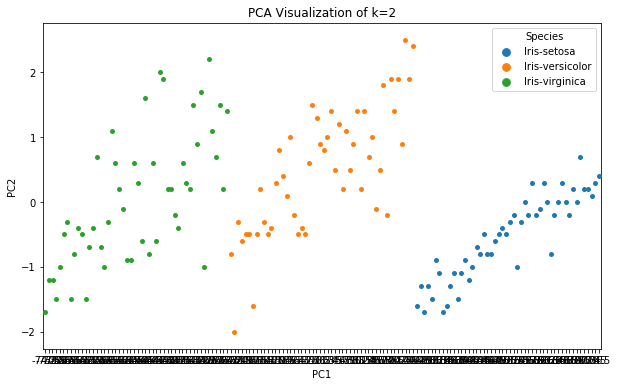

In [5]:
plt.figure(figsize=(10,6))
plt.title('PCA Visualization of k=2')
sns.stripplot(x='PC1', y='PC2', hue='Species', data=iris_pca)

In [0]:
# categorical column encoding
target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }
iris_pca['Species'] = iris_pca['Species'].apply(
    lambda x: target_map[x])

#### Decision Tree

In [0]:
iris_pca = iris_pca.values
X, y = iris_pca[:, :2], iris_pca[:, 2]
dt = DecisionTreeClassifier().fit(X, y)

In [0]:
# plot the boundary
def plot_boundary(model, X, y, target_names, model_name):
    n_classes = 3
    plot_step = 0.02

    # Plot the frame
    plt.figure(figsize = (10,6))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.axis('tight')

    # Plot the training points  
    for i in range(n_classes):
        idx = np.where(y == i)
        plt.scatter(x=X[idx, 0], 
                    y=X[idx, 1], 
                    label=target_names[i],
                    cmap=plt.cm.Paired)
        plt.axis('tight')
    
    if model_name == 'dt':        
        plt.title(
            'Decision surface of a decision tree using PCA features')
    elif model_name == 'lr':
        plt.title(
            'Decision surface of a logistic regression using PCA features')
    plt.legend()
    plt.show()

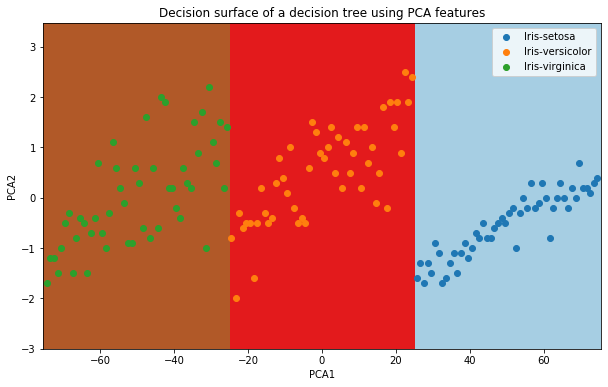

In [9]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_boundary(dt, X, y, target_names, 'dt')

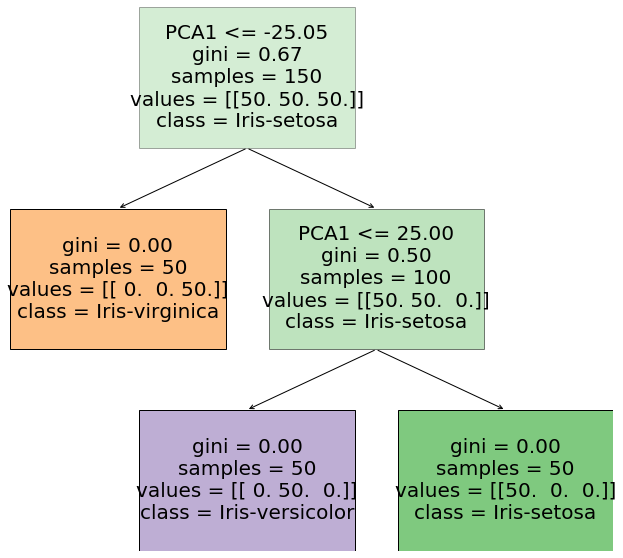

In [10]:
# visualize the decision tree
dtree = dtreeplt(model=dt,
                 feature_names=['PCA1', 'PCA2'],
                 target_names=target_names)
fig = dtree.view()

In [11]:
# accuracy of decision tree with PCA
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=10)
print('Accuracy: %0.3f (+/- %0.3f)' % \
      (scores.mean(), scores.std() * 2))

Accuracy: 0.947 (+/- 0.213)


#### Linear Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


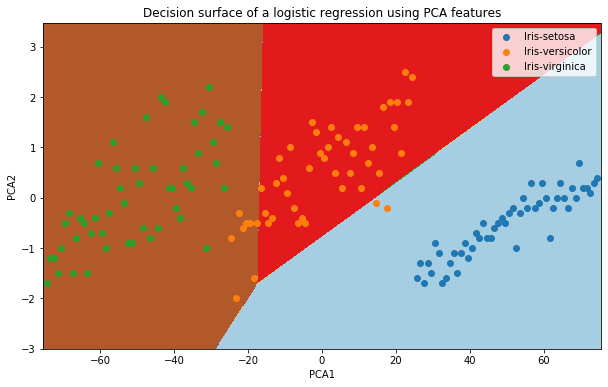

In [12]:
lr = LogisticRegression().fit(X, y)
plot_boundary(lr, X, y, target_names, 'lr')

In [13]:
# accuracy of logistic regression with PCA
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
print('Accuracy: %0.3f (+/- %0.3f)' % \
      (scores.mean(), scores.std() * 2))

Accuracy: 0.920 (+/- 0.259)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

#### Decision Tree Classification w/o feature extraction

In [0]:
iris['Species'] = iris['Species'].apply(lambda x: target_map[x])
feature_names = iris.columns[1:]
X, y = iris.iloc[:, 1:5], iris.iloc[:, 5]

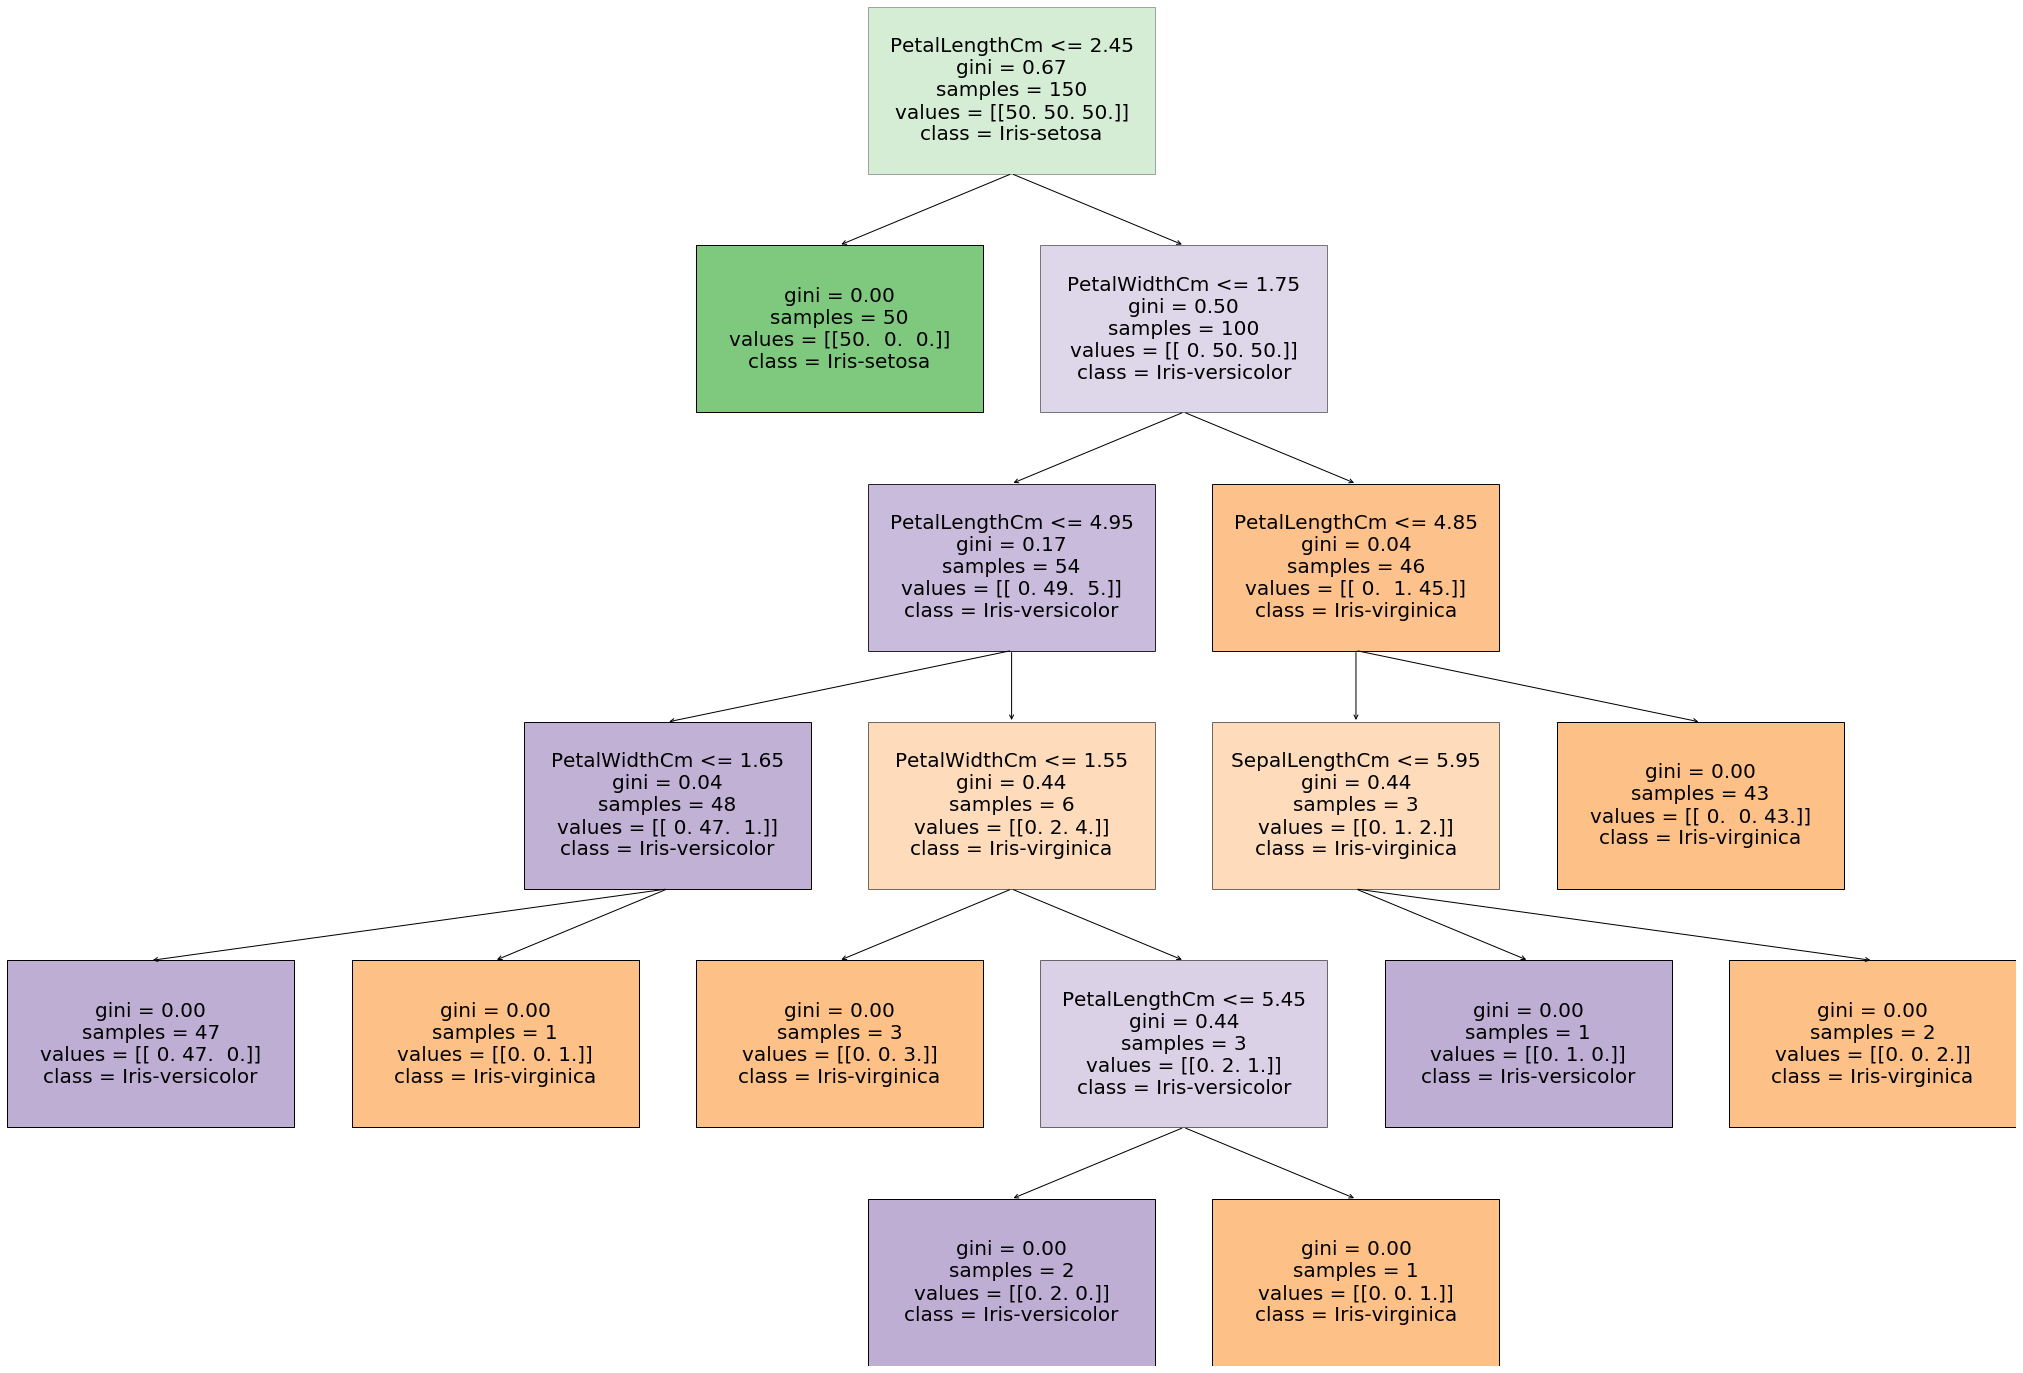

In [15]:
# vanilla: dt_1
dt_1 = DecisionTreeClassifier().fit(X, y)
dtree = dtreeplt(model=dt_1, 
                 feature_names=feature_names, 
                 target_names=target_names)
fig = dtree.view()

In [16]:
# accuracy of dt_1
dt_1 = DecisionTreeClassifier()
scores = cross_val_score(dt_1, X, y, cv=10)
print('Accuracy: %0.3f (+/- %0.3f)' % \
      (scores.mean(), scores.std() * 2))

Accuracy: 0.960 (+/- 0.088)


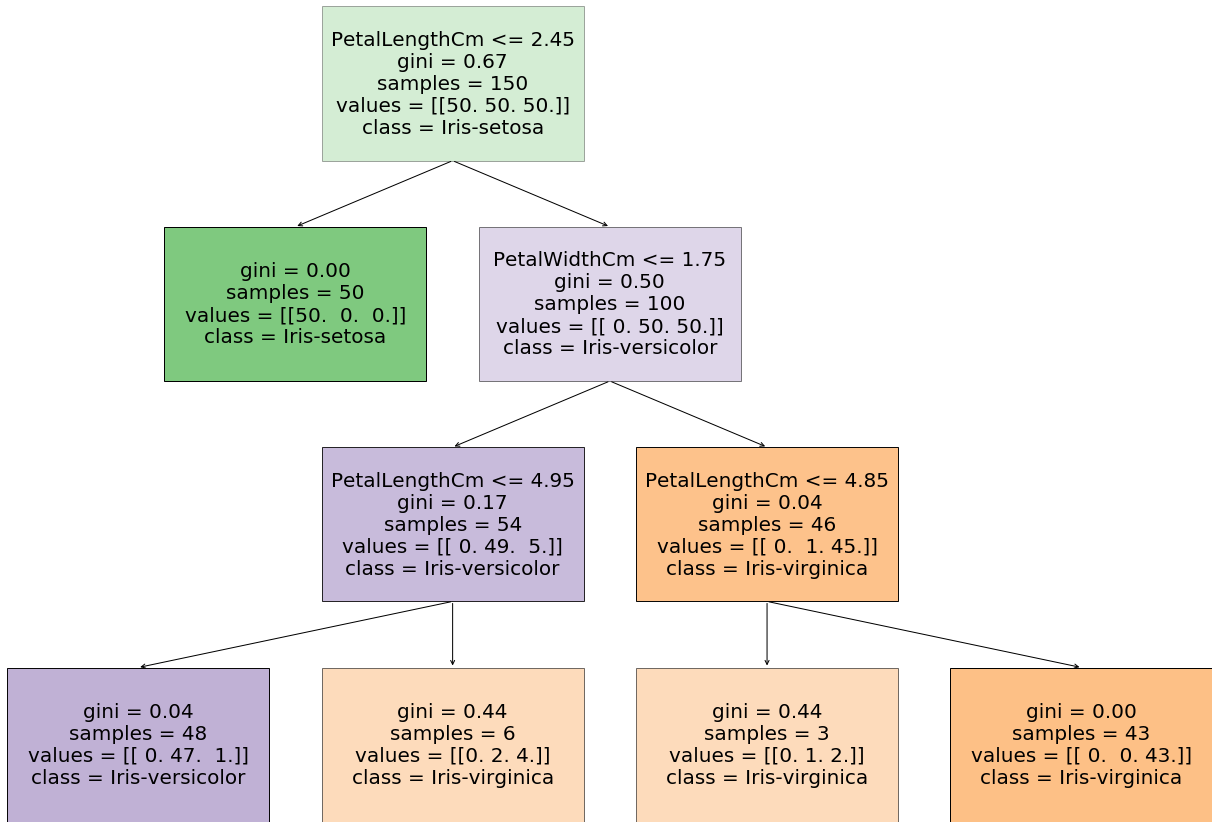

In [17]:
# maxdepth=3: dt_2
dt_2 = DecisionTreeClassifier(max_depth=3).fit(X, y)
dtree = dtreeplt(model=dt_2, 
                 feature_names=feature_names, 
                 target_names=target_names)
fig = dtree.view()

In [18]:
# accuracy of dt_2
dt_2 = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(dt_2, X, y, cv=10)
print('Accuracy: %0.3f (+/- %0.3f)' % \
      (scores.mean(), scores.std() * 2))

Accuracy: 0.960 (+/- 0.065)


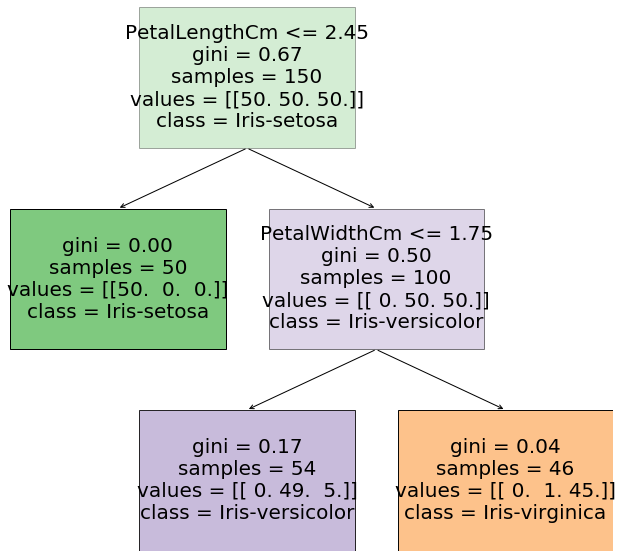

In [19]:
# max_leaf_nodes=3: dt_3
dt_3 = DecisionTreeClassifier(max_leaf_nodes=3).fit(X, y)
dtree = dtreeplt(model=dt_3, 
                 feature_names=feature_names, 
                 target_names=target_names)
fig = dtree.view()

In [20]:
# accuracy of dt_3
dt_3 = DecisionTreeClassifier(max_leaf_nodes=3)
scores = cross_val_score(dt_3, X, y, cv=10)
print('Accuracy: %0.3f (+/- %0.3f)' % \
      (scores.mean(), scores.std() * 2))

Accuracy: 0.947 (+/- 0.100)
